# Strassennamen in der Schweiz

## Schritt 1: Wo in der Schweiz enden die Strassen auf -matt (oder -chemin, -weg, usw.)? 

Schauen wir uns zuerst einmal alle Strassenbezeichnungen an:

In [140]:
import pandas as pd

In [141]:
df = pd.read_csv("strassenbezeichnungen_v2.csv", sep=";")

In [142]:
df.head(10)

,REC_ART,STRID,ONRP,STRBEZK,STRBEZL,STRBEZ2K,STRBEZ2L,STR_LOK_TYP,STRBEZ_SPC,STRBEZ_COFF,STR_GANZFACH,STR_FACH_ONRP
0,4,15011864,125,"Chalet-de-Praroman, ch.","Chalet-de-Praroman, chemin du",Ch. Chalet-de-Praroman,Chemin du Chalet-de-Praroman,1,2,J,NaN,NaN
1,4,30238,125,"Mollie Margot, route de","Mollie Margot, route de",Route de Mollie Margot,Route de Mollie Margot,1,2,J,NaN,NaN
2,4,30388,151,"Belles-Roches, avenue","Belles-Roches, avenue",Avenue Belles-Roches,Avenue Belles-Roches,1,2,J,NaN,NaN
3,4,30349,150,"Montbenon, avenue de","Montbenon, avenue de",Avenue de Montbenon,Avenue de Montbenon,1,2,J,NaN,NaN
4,4,30371,150,"Saint-François, rue","Saint-François, rue",Rue Saint-François,Rue Saint-François,1,2,J,NaN,NaN
5,4,30348,150,"Monnard, rue Charles-","Monnard, rue Charles-",Rue Charles-Monnard,Rue Charles-Monnard,1,2,J,NaN,NaN
6,4,30351,150,"Muret, passage Jean-","Muret, passage Jean-",Passage Jean-Muret,Passage Jean-Muret,1,2,J,NaN,NaN
7,4,30338,150,"Louve, rue de la","Louve, rue de la",Rue de la Louve,Rue de la Louve,1,2,J,NaN,NaN
8,4,30367,150,"Rôtillon, rue du","Rôtillon, rue du",Rue du Rôtillon,Rue du Rôtillon,1,2,J,NaN,NaN
9,4,30391,151,"Boisy, chemin du","Boisy, chemin du",Chemin du Boisy,Chemin du Boisy,1,2,J,NaN,NaN


Das sind die häufigsten Strassennamen:

In [143]:
df['STRBEZK'].value_counts().head(10)

Dorfstrasse         654
Hauptstrasse        532
Bahnhofstrasse      525
Birkenweg           310
Schulstrasse        293
Kirchweg            259
Oberdorfstrasse     255
Industriestrasse    253
Schulhausstrasse    234
Rosenweg            233
Name: STRBEZK, dtype: int64

Jetzt zeichnen wir die Karte

In [144]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches

In [145]:
#gdf_ch = gpd.read_file('plz_verzeichnis_v2.geojson') # PLZ laden
#gdf_gemeinden = gpd.read_file('shp/g1g17.shp') # Gemeinden laden
gdf_ch = gpd.read_file("shapePLZ/plz_verzeichnis_v2.shp")


title_font = {
    'family': 'sans-serif',
    'color':  'black',
    'weight': 'bold',
    'size': 20
}
point_names = {
    'family': 'sans-serif',
    'color':  'black',
    'weight': 'normal',
    'size': 10
}



In [149]:
gdf_ch.head(3)

,rec_art,onrp,bfsnr,plz_typ,postleitzah,plz_zz,gplz,ortbez18,ortbez27,kanton,sprachcode,sprachcode_,briefz_durc,gilt_ab_dat,plz_briefzu,plz_coff,geometry
0,01,1519.0,6754.0,10.0,2340.0,00,2340.0,Le Noirmont,Le Noirmont,JU,2.0,None,9046.0,19960919.0,234060.0,J,"POLYGON ((6.9436440414 47.2360068432, 6.944382..."
1,01,1522.0,6757.0,20.0,2354.0,00,2354.0,Goumois,Goumois,JU,2.0,None,9046.0,19960919.0,234060.0,J,"POLYGON ((6.9459473802 47.2805882184, 6.945951..."
2,01,1525.0,707.0,20.0,2732.0,03,2732.0,Saules BE,Saules BE,BE,2.0,None,1523.0,19990928.0,273200.0,J,"POLYGON ((7.2285642031 47.2401886474, 7.228489..."


Jetzt mergen + plotten

In [168]:
df_matte = df[df['STRBEZ2K'].str.endswith("matt")]

df_final = pd.merge(gdf_ch[gdf_ch['geometry'].notnull()], df_matte, left_on="onrp", right_on="ONRP", how="inner")

In [169]:
len(df_final)

2074

In [171]:
df_final.head(3)

,rec_art,onrp,bfsnr,plz_typ,postleitzah,plz_zz,gplz,ortbez18,ortbez27,kanton,...,ONRP,STRBEZK,STRBEZL,STRBEZ2K,STRBEZ2L,STR_LOK_TYP,STRBEZ_SPC,STRBEZ_COFF,STR_GANZFACH,STR_FACH_ONRP
0,01,1745.0,312.0,20.0,3035.0,00,3035.0,Frieswil,Frieswil,BE,...,1745,Zweienmatt,Zweienmatt,Zweienmatt,Zweienmatt,1,1,J,NaN,NaN
1,01,1745.0,312.0,20.0,3035.0,00,3035.0,Frieswil,Frieswil,BE,...,1745,Brünnmatt,Brünnmatt,Brünnmatt,Brünnmatt,1,1,J,NaN,NaN
2,01,1747.0,354.0,20.0,3037.0,00,3037.0,Herrenschwanden,Herrenschwanden,BE,...,1747,Thalmatt,Thalmatt,Thalmatt,Thalmatt,1,1,J,NaN,NaN


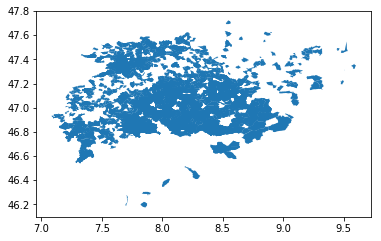

In [170]:
df_final.plot()

In [154]:
#gdf_ch.crs
#gdf_ch.crs = {'init': 'epsg:4326'}
#gdf_ch.to_crs(epsg=21781)
#4326 ist die nr. des geo-koordinatensystems und 21781 die des schweizer
#man muss das gdf zuerst initialisieren und dann umrechnen

/Users/leasenn/.virtualenvs/erstesVE/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)
/Users/leasenn/.virtualenvs/erstesVE/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


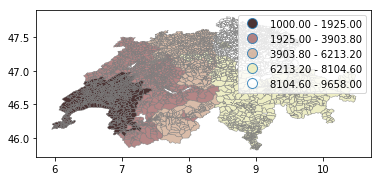

In [155]:
# Kleiner Test: Plotte nach PLZ
gdf_ch.plot(edgecolor='grey', column='gplz', cmap='pink', scheme='quantiles', alpha=0.8, linewidth=0.5, legend=True)

## Schritt 2: Häufigste Endungen

In [85]:
endungen = ['platz', 'matt', 'matte', 'egg', 'strasse', 'weg', 'boden', 'holz', 'grund', 'gasse', 'gass', 'acher', 'bühl']
anfange = ['Route', 'Rue', 'Avenue', 'Chemin', 'Ch.', 'Place', 'Av', 'Quai']

final_endungen = []
for endung in endungen[:1]:
    df_c = df[df['STRBEZ2K'].str.endswith(endung)]['STRBEZ2K']
    final_endungen.append({'name':endung, 'vorkommnisse':len(df_c)})
    #print("-"+endung+": total "+str(len(df_c)))
    #print(df_c.head(3))
    df_cur = df[df['STRBEZ2K'].str.endswith(endung)]
    df_final = pd.merge(gdf_ch, df_cur, left_on="onrp", right_on="ONRP", how="inner")


In [86]:
df_final.head(100)

,rec_art,onrp,bfsnr,plz_typ,postleitzah,plz_zz,gplz,ortbez18,ortbez27,kanton,...,ONRP,STRBEZK,STRBEZL,STRBEZ2K,STRBEZ2L,STR_LOK_TYP,STRBEZ_SPC,STRBEZ_COFF,STR_GANZFACH,STR_FACH_ONRP
0,01,1743.0,360.0,10.0,3033.0,00,3033.0,Wohlen b. Bern,Wohlen b. Bern,BE,...,1743,Musterplatz,Musterplatz,Musterplatz,Musterplatz,1,1,J,NaN,NaN
1,01,1777.0,627.0,10.0,3076.0,00,3076.0,Worb,Worb,BE,...,1777,Bahnhofplatz,Bahnhofplatz,Bahnhofplatz,Bahnhofplatz,1,1,J,NaN,NaN
2,01,1777.0,627.0,10.0,3076.0,00,3076.0,Worb,Worb,BE,...,1777,Schmitteplatz,Schmitteplatz,Schmitteplatz,Schmitteplatz,1,1,J,NaN,NaN
3,01,1777.0,627.0,10.0,3076.0,00,3076.0,Worb,Worb,BE,...,1777,Bärenplatz,Bärenplatz,Bärenplatz,Bärenplatz,1,1,J,NaN,NaN
4,01,1792.0,880.0,10.0,3088.0,00,3088.0,RÃ¼eggisberg,RÃ¼eggisberg,BE,...,1792,Helvetiaplatz,Helvetiaplatz,Helvetiaplatz,Helvetiaplatz,1,1,J,NaN,NaN
5,01,1835.0,855.0,10.0,3150.0,00,3150.0,Schwarzenburg,Schwarzenburg,BE,...,1835,Dorfplatz,Dorfplatz,Dorfplatz,Dorfplatz,1,1,J,NaN,NaN
6,01,1888.0,496.0,10.0,3232.0,00,3232.0,Ins,Ins,BE,...,1888,Dorfplatz,Dorfplatz,Dorfplatz,Dorfplatz,1,1,J,NaN,NaN
7,01,1932.0,2258.0,20.0,3284.0,00,3284.0,FrÃ¤schels,FrÃ¤schels,FR,...,1932,Bahnhofplatz,Bahnhofplatz,Bahnhofplatz,Bahnhofplatz,1,1,J,NaN,NaN
8,01,2077.0,606.0,10.0,3671.0,00,3671.0,Brenzikofen,Brenzikofen,BE,...,2077,Bahnhofplatz,Bahnhofplatz,Bahnhofplatz,Bahnhofplatz,1,1,J,NaN,NaN
9,01,2141.0,941.0,10.0,3634.0,00,3634.0,Thierachern,Thierachern,BE,...,2141,Eggplatz,Eggplatz,Eggplatz,Eggplatz,1,1,J,NaN,NaN


In [133]:
df_plot = pd.DataFrame(df_final.groupby(['onrp', 'ortbez18']).count())

In [138]:
df_plot

,,rec_art,bfsnr,plz_typ,postleitzah,plz_zz,gplz,ortbez27,kanton,sprachcode,sprachcode_,...,ONRP,STRBEZK,STRBEZL,STRBEZ2K,STRBEZ2L,STR_LOK_TYP,STRBEZ_SPC,STRBEZ_COFF,STR_GANZFACH,STR_FACH_ONRP
onrp,ortbez18,,,,,,,,,,,,,,,,,,,,,
125.0,Lausanne 25,10,10,10,10,10,10,10,10,10,0,...,10,10,10,10,10,10,10,10,0,0
126.0,Lausanne 26,16,16,16,16,16,16,16,16,16,0,...,16,16,16,16,16,16,16,16,0,0
127.0,Lausanne 27,8,8,8,8,8,8,8,8,8,0,...,8,8,8,8,8,8,8,8,0,0
150.0,Lausanne,88,88,88,88,88,88,88,88,88,0,...,88,88,88,88,88,88,88,88,2,0
151.0,Lausanne,83,83,83,83,83,83,83,83,83,0,...,83,83,83,83,83,83,83,83,0,0
152.0,Lausanne,73,73,73,73,73,73,73,73,73,0,...,73,73,73,73,73,73,73,73,0,0
153.0,Lausanne,70,70,70,70,70,70,70,70,70,0,...,70,70,70,70,70,70,70,70,0,0
154.0,Lausanne,87,87,87,87,87,87,87,87,87,0,...,87,87,87,87,87,87,87,87,6,0
156.0,Prilly,78,78,78,78,78,78,78,78,78,0,...,78,78,78,78,78,78,78,78,3,0


In [61]:
final_endungen

[{'name': 'platz', 'vorkommnisse': 813},
 {'name': 'matt', 'vorkommnisse': 2062},
 {'name': 'matte', 'vorkommnisse': 653},
 {'name': 'egg', 'vorkommnisse': 871},
 {'name': 'strasse', 'vorkommnisse': 39547},
 {'name': 'weg', 'vorkommnisse': 24612},
 {'name': 'boden', 'vorkommnisse': 402},
 {'name': 'holz', 'vorkommnisse': 358},
 {'name': 'grund', 'vorkommnisse': 105},
 {'name': 'gasse', 'vorkommnisse': 3256},
 {'name': 'gass', 'vorkommnisse': 273},
 {'name': 'acher', 'vorkommnisse': 705},
 {'name': 'bühl', 'vorkommnisse': 378}]

In [44]:
len(df)

169093

## Schritt 3: Lustige Strassennamen

In [57]:
import re

def regex_filter(val):
    if val:
        mo = re.search(".*Löli.*",val)
        if mo:
            return True
        else:
            return False
    else:
        return False

df[df['STRBEZK'].apply(regex_filter)]


,REC_ART,STRID,ONRP,STRBEZK,STRBEZL,STRBEZ2K,STRBEZ2L,STR_LOK_TYP,STRBEZ_SPC,STRBEZ_COFF,STR_GANZFACH,STR_FACH_ONRP
68030,4,76158113,3240,Löli,Löli,Löli,Löli,1,1,J,NaN,NaN
90409,4,76101516,2510,Lölimattweg,Lölimattweg,Lölimattweg,Lölimattweg,1,1,J,NaN,NaN
95957,4,41028203,2686,Im Löli,Im Löli,Im Löli,Im Löli,1,1,J,NaN,NaN
100157,4,874,2510,Löliring,Löliring,Löliring,Löliring,1,1,J,NaN,NaN


## 